In [2]:
import pandas as pd

eeg_file = "../../data/Rubert_14_may/Rubert_ojo_izdo_1/EEG.csv"

df = pd.read_csv(eeg_file)
df.head()

,timestamp,sequence,battery,flags,EEG-ch1,EEG-ch2,EEG-ch3,EEG-ch4,EEG-ch5,EEG-ch6,EEG-ch7,EEG-ch8,EEG-ch9,EEG-ch10,EEG-ch11,EEG-ch12,EEG-ch13,EEG-ch14,EEG-ch15,EEG-ch16
0,153542513428,11491,-2,0,-2253.104588,-7348.631825,30867.755530,721.459248,23027.037710,10291.620488,21888.567156,31233.528664,-9999.145560,-4418.224561,18326.498247,11566.198898,-16949.479997,17606.839818,-11037.999179,10834.725636
1,153542513428,11491,-2,0,-2246.874728,-7346.538982,30870.979970,720.254646,23028.181473,10292.606072,21887.374722,31232.494410,-9999.169895,-4418.589592,18327.216141,11565.748693,-16949.029793,17604.746974,-11040.773414,10833.654879
2,153542513428,11491,-2,0,-2238.673700,-7346.125280,30877.246333,724.355160,23030.103969,10293.762003,21887.009691,31233.479993,-10000.630019,-4416.995624,18326.108881,11570.007387,-16948.689097,17603.773559,-11042.635072,10832.973488
3,153542513428,11491,-2,0,-2232.602019,-7349.313216,30881.967400,728.163649,23032.087304,10293.968854,21888.798343,31235.633676,-9998.963044,-4414.841941,18328.140886,11575.020478,-16949.151470,17608.433787,-11038.510222,10833.496699
4,153542513428,11491,-2,0,-2240.523190,-7352.391644,30877.733041,724.330824,23029.860615,10293.019773,21888.226461,31234.331732,-9998.987380,-4416.204723,18328.226060,11571.832542,-16951.572841,17608.664973,-11035.942838,10833.472363


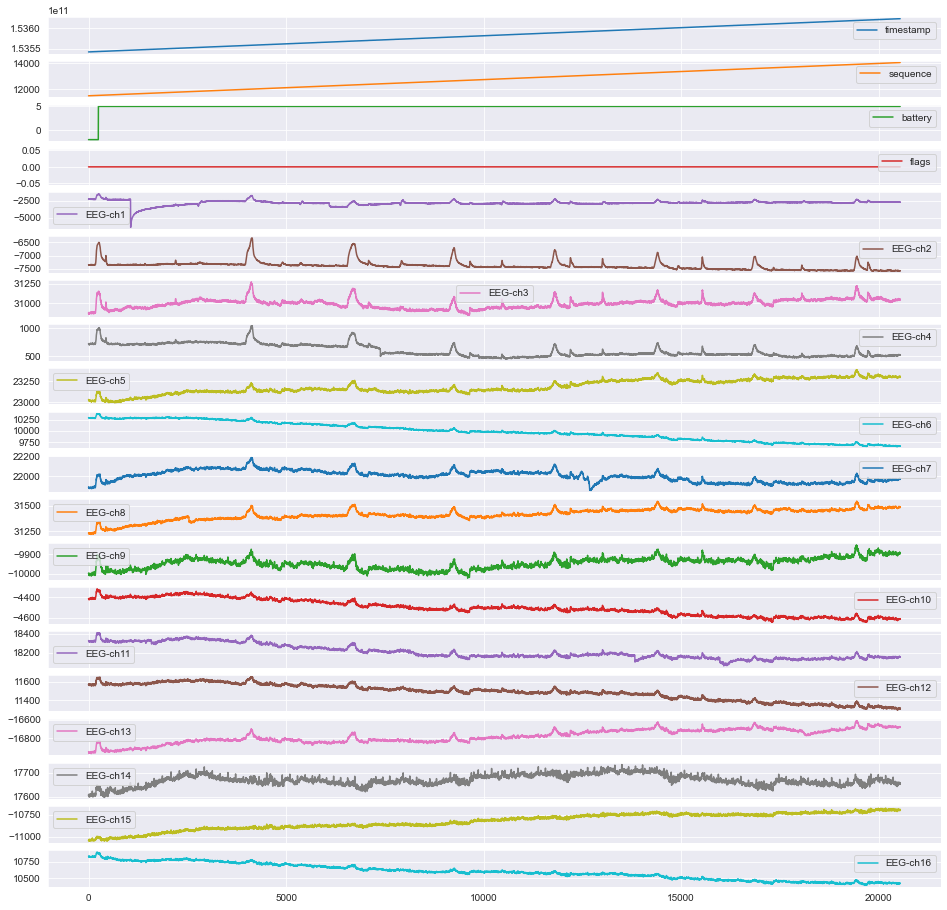

In [3]:
df.plot(subplots=True, figsize=(16, 16));

In [4]:
import bbtools as bbt

raw_rubert = bbt.read_csv(eeg_file,
                        ['Fp1', 'Fp2', 'F3', 'F4', 'C1', 'C3', 'C2', 'C4', 'CP1', 'CP3', 'CP2', 'CP4', 'Cz', 'O1', 'O2', 'Pz'])

Creating RawArray with float64 data, n_channels=16, n_times=20544
    Range : 0 ... 20543 =      0.000 ...    80.246 secs
Ready.


Effective window size : 8.000 (s)


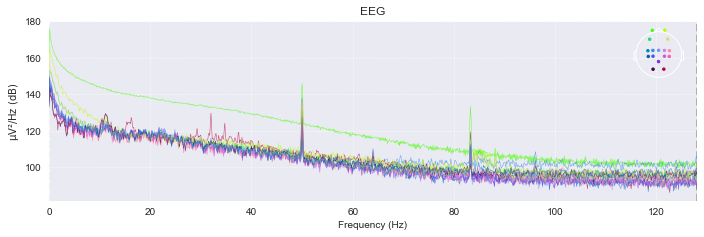

In [5]:
plot_raw = raw_rubert.plot_psd(fmin = 0, fmax = 128, average=False, tmin = 0, tmax = 120)
#plot_raw = raw_rubert.plot_psd(fmin = 0, fmax = 128, average=True, tmin = 0, tmax = 120)
#plot_raw = raw_rubert.plot_psd()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (6.605 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Effective window size : 8.000 (s)


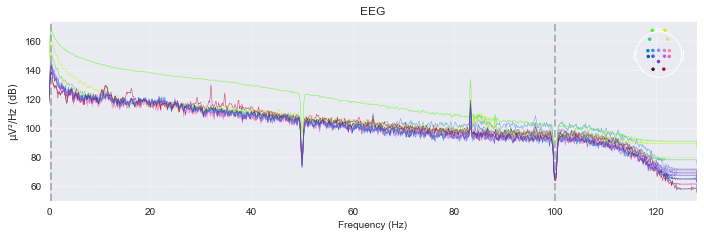

In [6]:
filtered_rubert = bbt.filters(raw_rubert)
plot_filtered = filtered_rubert.plot_psd(fmin = 0, fmax = 128, average=False, tmin = 0, tmax = 120)

In [7]:
import bbtools as bbt

sampling_rate = 256
window_time = 2.5 # segs
window_size = int(window_time * sampling_rate)
n_channels = 16

eeg_data = filtered_rubert['data'][0]
channelsData = bbt.signal_raw_to_windows(eeg_data, window_size, n_channels)

print("channels, windows, samples")
print(channelsData.shape)

channels, windows, samples
(16, 32, 640)


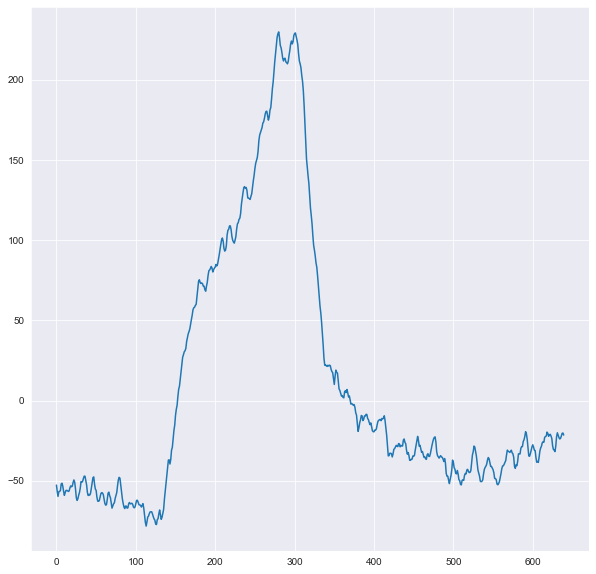

In [11]:
import matplotlib.pyplot as plt

channel = channelsData[3]
# shape (samples, window)

# Data sequence
# pause pause signal pause ...

window = channel[6]

plt.figure(figsize=(10,10))
plt.plot(window)
plt.show()

In [12]:
# save artifact into pickle
import pickle

filename = '../../data/pickle/channel_'+ str(3) + '_rubert_left_blink.pkl'
pickle.dump(window, open(filename, 'wb'))